In [29]:
from pickle import TRUE
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import datetime as dt
from datetime import datetime
import email.utils as eutils
from statistics import mean
import time
import math
import os

ValueError: x and y must have same first dimension, but have shapes (8760,) and (1,)

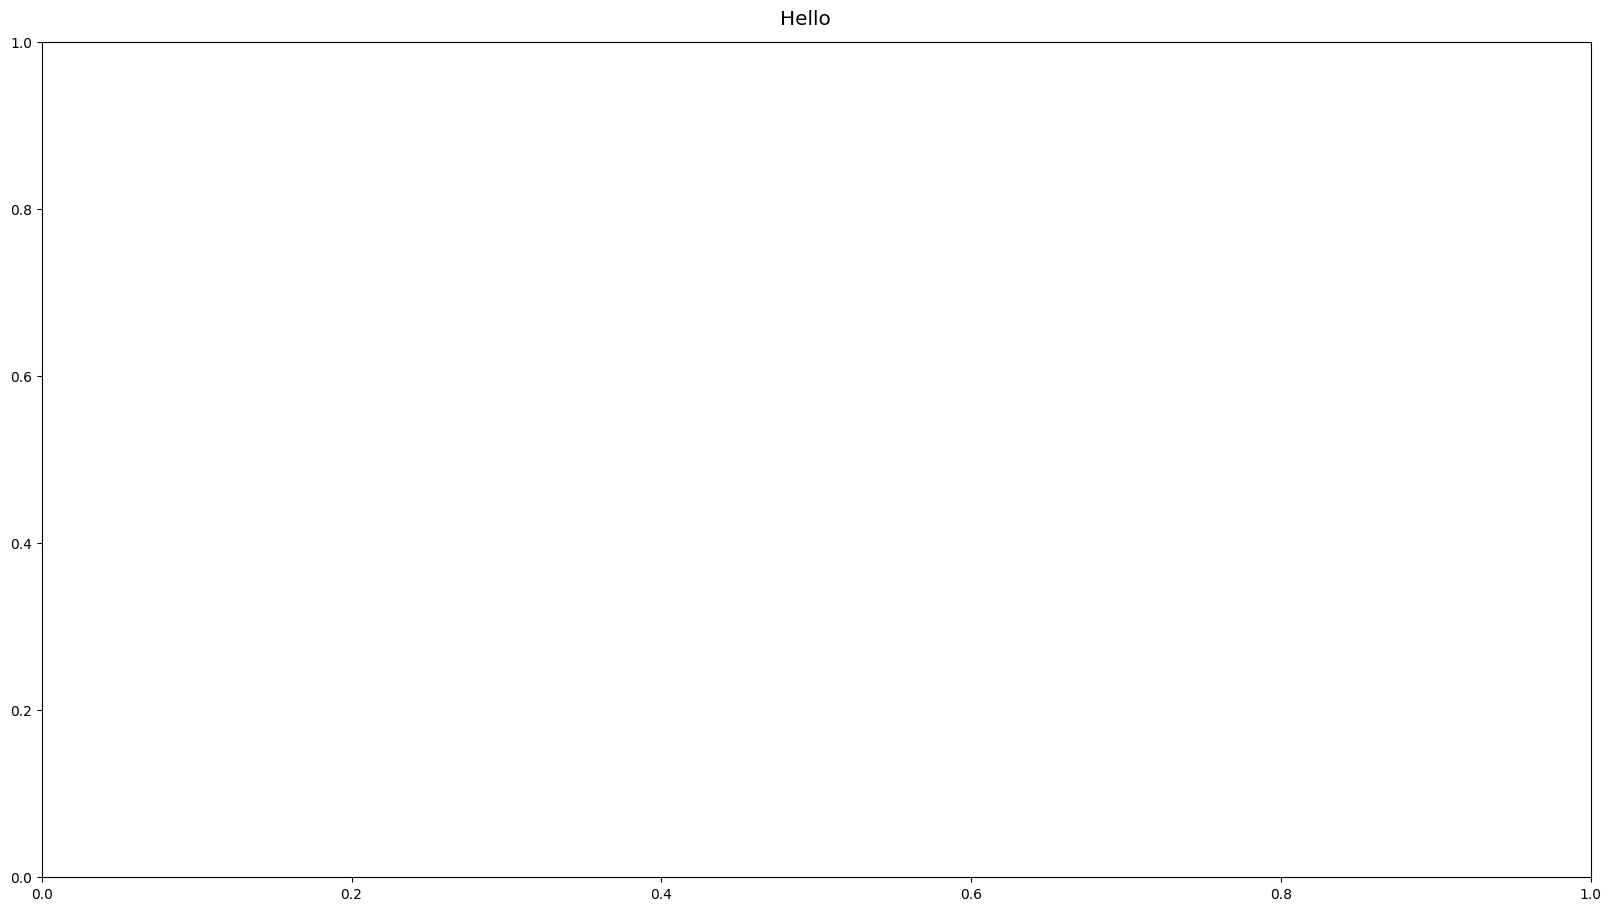

In [50]:
os.chdir('C:/Consulting/2024-001_Hourly Study/01_Model/Hourly Outputs/')

dvele_case = pd.read_csv('Chicago Dvele.csv')
dvele_case.head()

fig = plt.figure(layout='constrained', figsize=(16, 9))
fig.suptitle(('Hello'), fontsize='x-large')
ax = fig.subplot_mosaic([['hourly']])

used = []

x = dvele_case['Hours since 00:00 Jan 1']
# y = np.row_stack((dvele_case['Chicago Dvele - End Use:  Electricity: Hot Water (kWh)'],
#                   dvele_case['Chicago Dvele - End Use:  Electricity: Lighting Interior (kWh)'],
#                   dvele_case['Chicago Dvele - End Use:  Electricity: Lighting Exterior (kWh)'],
#                   dvele_case['Chicago Dvele - End Use:  Electricity: Mech Vent (kWh)'],
#                   dvele_case['Chicago Dvele - End Use:  Electricity: Refrigerator (kWh)'],
#                   Chicago Dvele - End Use:  Electricity: Dishwasher (kWh)
# Chicago Dvele - End Use:  Electricity: Clothes Washer (kWh)
# Chicago Dvele - End Use:  Electricity: Clothes Dryer (kWh)
# Chicago Dvele - End Use:  Electricity: Range/Oven (kWh)
# Chicago Dvele - End Use:  Electricity: Television (kWh)
# Chicago Dvele - End Use:  Electricity: Plug Loads (kWh)'],
#                   dvele_case['Chicago Dvele - End Use:  Electricity: Heating (kWh)'],
#                   dvele_case['Chicago Dvele - End Use:  Electricity: Heating Fans/Pumps (kWh)'],
#                   dvele_case['Chicago Dvele - End Use:  Electricity: Heating Heat Pump Backup (kWh)'],
#                   dvele_case['Chicago Dvele - End Use:  Electricity: Cooling (kWh)'],
#                   dvele_case['Chicago Dvele - End Use:  Electricity: Cooling Fans/Pumps (kWh)'],
#                   dvele_case['Chicago Dvele - End Use:  Electricity: Cooling Fans/Pumps (kWh)'],
#                   ))
y = np.row_stack(dvele_case['Hours since 00:00 Jan 1'])
for column in dvele_case.columns:
    if 'Hours' not in column:
        add = np.array(dvele_case[column])
y_stack = np.cumsum(y, axis=0)
ax['hourly'].plot(x, y_stack[0,:],color='red',linewidth=0.01,label='Heating')
ax['hourly'].plot(x, y_stack[1,:],color='orange',linewidth=0.01,label='Heating Fans/pumps')
ax['hourly'].plot(x, y_stack[2,:],color='yellow',linewidth=0.01,label='Backup Heating')
ax['hourly'].plot(x, y_stack[3,:],color='blue',linewidth=0.01,label='Cooling')
ax['hourly'].plot(x, y_stack[3,:],color='skyblue',linewidth=0.01,label='Cooling Fans/Pumps')
ax['hourly'].set_ylabel('Electircal Consumption [kWh]')
ax['hourly'].set_xlabel('Hour of Year')
ax['hourly'].grid(True)
leg = ax['hourly'].legend(ncol=2, loc='upper right', borderaxespad=0, fontsize='x-small')
leg_lines = leg.get_lines()
plt.setp(leg_lines, linewidth=4)

ax['hourly'].fill_between(x, 0, y_stack[0,:], facecolor='red')
ax['hourly'].fill_between(x, y_stack[0,:], y_stack[1,:], facecolor='orange')
ax['hourly'].fill_between(x, y_stack[1,:], y_stack[2,:], facecolor='yellow')
ax['hourly'].fill_between(x, y_stack[2,:], y_stack[3,:], facecolor='blue')
ax['hourly'].fill_between(x, y_stack[3,:], y_stack[4,:], facecolor='skyblue')

for column in dvele_case.columns:
    if 'Hours' not in column:
        print(column)

In [ ]:
fig = plt.figure(layout='constrained', figsize=(10, 10))
fig.suptitle((str(caseName) + '_Cooling Outage Resilience'), fontsize='x-large')
ax = fig.subplot_mosaic([['temperature'],['rh'],['HI']])
ax['temperature'].plot(x,hourlyCool["Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)"], label="Site Dry Bulb [C]", linestyle='dashed')
ax['temperature'].plot(x,hourlyCool["ZONE 1:Zone Air Temperature [C](Hourly)"], label="Zone Dry Bulb [C]",color='black',linewidth=2)
ax['temperature'].set_ylim(((min(min(hourlyCool["Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)"]), min(hourlyCool["ZONE 1:Zone Air Temperature [C](Hourly)"])))-5),((max(max(hourlyCool["Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)"]), max(hourlyCool["ZONE 1:Zone Air Temperature [C](Hourly)"])))+5))
ax['temperature'].set_ylabel('Temperature [C]')
ax['temperature'].legend(ncol=2, loc='lower left', borderaxespad=0, fontsize='x-small')
ax['temperature'].grid(True)

ax['rh'].plot(x,hourlyCool['ZONE 1:Zone Air Relative Humidity [%](Hourly)'], label=("Zone RH"),color='black',linewidth=2)
ax['rh'].set_ylabel('Relative Humidity [%]')
ax['rh'].set_ylim(0,100)
ax['rh'].legend(ncol=2, loc='lower left', borderaxespad=0, fontsize='x-small')
ax['rh'].grid(True)

ax['HI'].plot(x,hourlyCool['ZONE 1:Zone Heat Index [C](Hourly)'], label=("Zone HI"),color='black',linewidth=2)
ax['HI'].grid(True)
ax['HI'].legend(ncol=2, loc='lower left', borderaxespad=0, fontsize='x-small')
ax['HI'].set_ylim((min(hourlyCool['ZONE 1:Zone Heat Index [C](Hourly)'])-5),(max(hourlyCool['ZONE 1:Zone Heat Index [C](Hourly)'])+5))
ax['HI'].set_xlabel('Date')
ax['HI'].set_ylabel('Heat Index [°C]')
ax['HI'].axhline(26.7, color='seagreen', linestyle='dashed')
ax['HI'].axhline(32.2, color='orange', linestyle='dashed')
ax['HI'].axhline(39.4, color='crimson', linestyle='dashed')
ax['HI'].axhline(51.7, color='darkmagenta', linestyle='dashed')